In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

plt.rcParams['font.family'] = 'Malgun Gothic'

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [25]:
train_df = pd.read_csv('./train.csv')
test_df = pd.read_csv('./test.csv')

In [26]:
len(train_df)

2207

<AxesSubplot:xlabel='착과량(int)', ylabel='Count'>

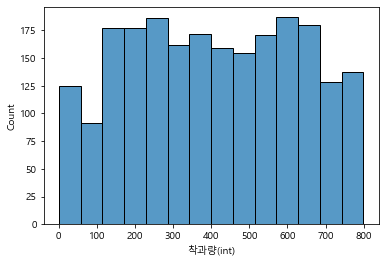

In [27]:
sns.histplot(train_df['착과량(int)'])

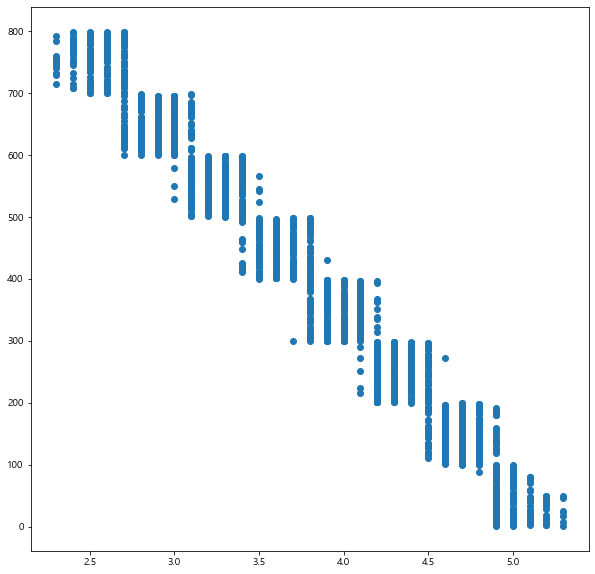

In [28]:
#see outlier of all data
plt.figure(figsize=(10,10))
plt.scatter(train_df['2022-09-01 새순'], train_df['착과량(int)'])
plt.show()

In [29]:
train_df.head()

,ID,착과량(int),수고(m),수관폭1(min),수관폭2(max),수관폭평균,2022-09-01 새순,2022-09-02 새순,2022-09-03 새순,2022-09-04 새순,...,2022-11-19 엽록소,2022-11-20 엽록소,2022-11-21 엽록소,2022-11-22 엽록소,2022-11-23 엽록소,2022-11-24 엽록소,2022-11-25 엽록소,2022-11-26 엽록소,2022-11-27 엽록소,2022-11-28 엽록소
0,TRAIN_0000,692,275.0,287.0,292.0,289.5,2.8,2.8,2.7,2.7,...,70.978249,70.876794,70.705253,70.559603,70.427356,70.340491,70.293830,70.262422,70.169841,70.043251
1,TRAIN_0001,534,293.0,284.0,336.0,310.0,3.3,3.3,3.3,3.2,...,71.535483,71.382303,71.253604,71.092665,70.955608,70.796630,70.597550,70.565088,70.560502,70.427600
2,TRAIN_0002,634,300.0,392.0,450.0,421.0,3.0,2.9,2.9,2.9,...,71.279804,71.199570,71.144020,71.026740,70.920038,70.876723,70.710129,70.595971,70.418203,70.399578
3,TRAIN_0003,639,289.0,368.0,379.0,373.5,3.1,3.0,3.0,3.0,...,69.934615,69.884124,69.845683,69.794682,69.779813,69.614644,69.455404,69.281590,69.238689,69.133970
4,TRAIN_0004,496,306.0,353.0,358.0,355.5,3.7,3.6,3.6,3.6,...,68.313016,68.285364,68.209860,68.209458,68.040083,67.859963,67.775556,67.701456,67.504244,67.410093


In [30]:
test_df.head()

,ID,수고(m),수관폭1(min),수관폭2(max),수관폭평균,2022-09-01 새순,2022-09-02 새순,2022-09-03 새순,2022-09-04 새순,2022-09-05 새순,...,2022-11-19 엽록소,2022-11-20 엽록소,2022-11-21 엽록소,2022-11-22 엽록소,2022-11-23 엽록소,2022-11-24 엽록소,2022-11-25 엽록소,2022-11-26 엽록소,2022-11-27 엽록소,2022-11-28 엽록소
0,TEST_0000,231.0,219.0,302.0,260.5,4.3,4.2,4.2,4.1,4.1,...,72.091497,71.906176,71.886799,71.858720,71.725540,71.531618,71.476935,71.321237,71.184295,71.000223
1,TEST_0001,206.0,324.0,346.0,335.0,2.5,2.5,2.5,2.5,2.5,...,68.423776,68.353200,68.346777,68.188159,67.995233,67.879958,67.744820,67.673522,67.539973,67.447849
2,TEST_0002,282.0,373.0,404.0,388.5,4.7,4.7,4.6,4.6,4.5,...,74.435783,74.247468,74.142664,74.070401,73.892408,73.796143,73.615838,73.440136,73.387051,73.228319
3,TEST_0003,234.0,337.0,357.0,347.0,3.6,3.6,3.6,3.6,3.5,...,73.570735,73.420243,73.313538,73.149298,73.109599,72.924511,72.847411,72.838263,72.672156,72.538171
4,TEST_0004,222.0,329.0,347.0,338.0,2.7,2.7,2.7,2.7,2.6,...,72.216758,72.163153,72.052952,71.905982,71.766141,71.746813,71.668847,71.501043,71.419715,71.328224


In [31]:
# find the columns that header contain '새순'
new_columns = []
for col in train_df.columns:
    if '새순' in col:
        new_columns.append(col)

# use new_columns to create data for lstm
data_train_lstm_x = train_df[new_columns].to_numpy()
data_test_lstm = test_df[new_columns].to_numpy()

# reshape (2207, 89) to (2207, 89, 1)
data_train_lstm_x = np.expand_dims(data_train_lstm_x, axis=2)
data_test_lstm = np.expand_dims(data_test_lstm, axis=2)

In [7]:
# find the columns that header contain '새순'
new_columns = []
for col in train_df.columns:
    if '새순' in col:
        new_columns.append(col)

# find the columns that header contain '엽록소'
new_columns_2 = []
for col in train_df.columns:
    if '엽록소' in col:
        new_columns_2.append(col)

# mean value of columns that header contain '새순'
new_columns_mean = train_df[new_columns].mean(axis=1)
new_columns_mean_2 = test_df[new_columns].mean(axis=1)

# mean value of columns that header contain '엽록소'
new_columns_mean_3 = train_df[new_columns_2].mean(axis=1)
new_columns_mean_4 = test_df[new_columns_2].mean(axis=1)

# add new columns
train_df['새순_mean'] = new_columns_mean
test_df['새순_mean'] = new_columns_mean_2

train_df['엽록소_mean'] = new_columns_mean_3
test_df['엽록소_mean'] = new_columns_mean_4

# std value of columns that header contain '새순'
new_columns_std = train_df[new_columns].std(axis=1)
new_columns_std_2 = test_df[new_columns].std(axis=1)

# std value of columns that header contain '엽록소'
new_columns_std_3 = train_df[new_columns_2].std(axis=1)
new_columns_std_4 = test_df[new_columns_2].std(axis=1)

# add new columns
train_df['새순_std'] = new_columns_std
test_df['새순_std'] = new_columns_std_2

train_df['엽록소_std'] = new_columns_std_3
test_df['엽록소_std'] = new_columns_std_4

# min - max value of columns that header contain '새순'
new_columns_min_max = train_df[new_columns].max(axis=1) - train_df[new_columns].min(axis=1)
new_columns_min_max_2 = test_df[new_columns].max(axis=1) - test_df[new_columns].min(axis=1)

# min - max value of columns that header contain '엽록소'
new_columns_min_max_3 = train_df[new_columns_2].max(axis=1) - train_df[new_columns_2].min(axis=1)
new_columns_min_max_4 = test_df[new_columns_2].max(axis=1) - test_df[new_columns_2].min(axis=1)

# add new columns
train_df['새순_min_max'] = new_columns_min_max
test_df['새순_min_max'] = new_columns_min_max_2

train_df['엽록소_min_max'] = new_columns_min_max_3
test_df['엽록소_min_max'] = new_columns_min_max_4

# sum value of columns that header contain '새순'
new_columns_sum = train_df[new_columns].sum(axis=1)
new_columns_sum_2 = test_df[new_columns].sum(axis=1)

# sum value of columns that header contain '엽록소'
new_columns_sum_3 = train_df[new_columns_2].sum(axis=1)
new_columns_sum_4 = test_df[new_columns_2].sum(axis=1)

# add new columns
train_df['새순_sum'] = new_columns_sum
test_df['새순_sum'] = new_columns_sum_2

train_df['엽록소_sum'] = new_columns_sum_3
test_df['엽록소_sum'] = new_columns_sum_4

# max value of columns that header contain '새순'
new_columns_max = train_df[new_columns].max(axis=1)
new_columns_max_2 = test_df[new_columns].max(axis=1)

# max value of columns that header contain '엽록소'
new_columns_max_3 = train_df[new_columns_2].max(axis=1)
new_columns_max_4 = test_df[new_columns_2].max(axis=1)

# add new columns
train_df['새순_max'] = new_columns_max
test_df['새순_max'] = new_columns_max_2

train_df['엽록소_max'] = new_columns_max_3
test_df['엽록소_max'] = new_columns_max_4

# min value of columns that header contain '새순'
new_columns_min = train_df[new_columns].min(axis=1)
new_columns_min_2 = test_df[new_columns].min(axis=1)

# min value of columns that header contain '엽록소'
new_columns_min_3 = train_df[new_columns_2].min(axis=1)
new_columns_min_4 = test_df[new_columns_2].min(axis=1)

# add new columns
train_df['새순_min'] = new_columns_min
test_df['새순_min'] = new_columns_min_2

train_df['엽록소_min'] = new_columns_min_3
test_df['엽록소_min'] = new_columns_min_4

# drop columns that header contain '새순'
train_df = train_df.drop(new_columns, axis=1)
test_df = test_df.drop(new_columns, axis=1)

# drop columns that header contain '엽록소'
train_df = train_df.drop(new_columns_2, axis=1)
test_df = test_df.drop(new_columns_2, axis=1)

In [8]:
train_df.head()

,ID,착과량(int),수고(m),수관폭1(min),수관폭2(max),수관폭평균,새순_mean,엽록소_mean,새순_std,엽록소_std,새순_min_max,엽록소_min_max,새순_sum,엽록소_sum,새순_max,엽록소_max,새순_min,엽록소_min
0,TRAIN_0000,692,275.0,287.0,292.0,289.5,1.693258,74.155836,0.638143,2.427798,2.2,8.293252,150.7,6599.869379,2.8,78.336504,0.6,70.043251
1,TRAIN_0001,534,293.0,284.0,336.0,310.0,1.861798,74.962123,0.894491,2.813831,3.3,9.689090,165.7,6671.628961,3.3,80.116691,0.0,70.427600
2,TRAIN_0002,634,300.0,392.0,450.0,421.0,1.762921,74.727999,0.712611,2.476758,2.5,8.718951,156.9,6650.791902,3.0,79.118529,0.5,70.399578
3,TRAIN_0003,639,289.0,368.0,379.0,373.5,1.857303,73.546210,0.692802,2.641605,2.4,8.802293,165.3,6545.612693,3.1,77.936262,0.7,69.133970
4,TRAIN_0004,496,306.0,353.0,358.0,355.5,2.125843,71.841067,0.898171,2.642378,3.1,8.823138,189.2,6393.854932,3.7,76.233231,0.6,67.410093


c:\Users\gosud\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<AxesSubplot:>

c:\Users\gosud\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


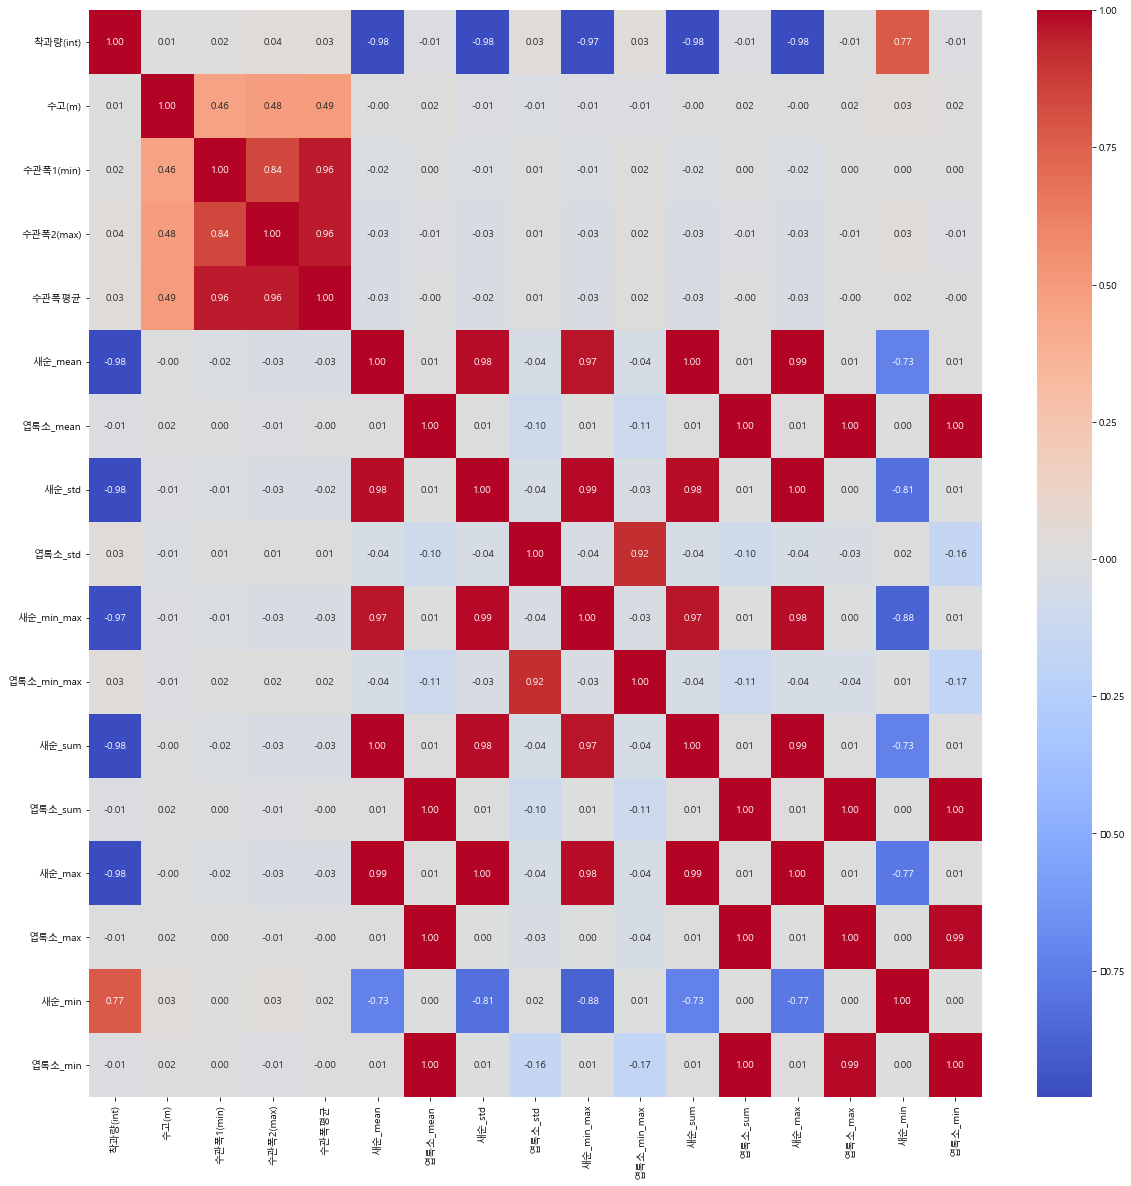

In [9]:
#Heatmap을 통해 coefficient using Pearson correlation
corr = train_df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')

In [10]:
# correlation with target variable
corr_target = abs(corr['착과량(int)'])
# select highly correlated features
relevant_features = corr_target[corr_target>0.1]
relevant_features

착과량(int)      1.000000
새순_mean       0.975513
새순_std        0.979240
새순_min_max    0.966337
새순_sum        0.975513
새순_max        0.980777
새순_min        0.769204
Name: 착과량(int), dtype: float64

In [11]:
data_train_X = train_df.drop(['ID','착과량(int)'], axis=1)
data_train_y = train_df['착과량(int)']
data_test = test_df.drop(['ID'], axis=1)

In [12]:
df_scaled = data_train_X.copy()

for column in df_scaled.columns:
    data_train_X[column] = data_train_X[column] / df_scaled[column].abs().max()
    data_test[column] = data_test[column] / df_scaled[column].abs().max()

In [13]:
def NMAE(true, pred):
    mae = np.mean(np.abs(true-pred))
    score = mae / np.mean(np.abs(true))
    return score

In [14]:
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.utils import shuffle
from lightgbm import LGBMRegressor, early_stopping
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
import category_encoders
import copy

from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.callbacks import *

import tensorflow as tf

tf.random.set_seed(42)

skf = KFold(n_splits = 5, random_state = 42, shuffle = True) #총 10번의 fold 진행
n = 0 #x번째 fold인지 기록

fold_target_pred = []

for train_index, valid_index in skf.split(data_train_X):
    n += 1
    
    target_pred = []   #test set pred 결과 저장
    val_pred_name = [] # validation pred model 이름 저장
    val_pred = []   # validation set pred 결과 저장

    #drop range feature
    train_X = np.array(data_train_X).astype('float32')
    train_lstm_X = data_train_lstm_x.astype('float32')
    train_Y = np.array(data_train_y).astype('float32')
    
    X_train, X_valid = train_X[train_index], train_X[valid_index]
    X_lstm_train, X_lstm_valid = train_lstm_X[train_index], train_lstm_X[valid_index]
    y_train, y_valid = train_Y[train_index], train_Y[valid_index]
    
    X_test = np.array(data_test).astype('float32')
    X_lstm_test = data_test_lstm.astype('float32')
    
    ### multi modal with lstm and dnn
    lstm_input = Input(shape=(X_lstm_train.shape[1], X_lstm_train.shape[2]))
    lstm = GRU(128, return_sequences=True)(lstm_input)
    lstm = GRU(64, return_sequences=False)(lstm)
    lstm = Dense(32, activation='elu')(lstm)

    dnn_input = Input(shape=(X_train.shape[1],))
    dnn = Dense(128, activation='elu')(dnn_input)
    dnn = Dense(64, activation='elu')(dnn)
    dnn = Dense(32, activation='elu')(dnn)

    concat = concatenate([lstm, dnn])
    concat = Dense(32, activation='elu')(concat)
    concat = Dense(8, activation='elu')(concat)
    output = Dense(1, activation='elu')(concat)    

    model = Model(inputs=[dnn_input, lstm_input], outputs=output)

    model.compile(loss='mean_absolute_error',
                  optimizer = tf.keras.optimizers.Nadam(learning_rate=0.004),
                  metrics=['mae'])
    
    filename = 'nn-checkpoint.h5'
    checkpoint = ModelCheckpoint(filename,             # file명을 지정합니다
                                monitor='val_mae',   # val_accuracy 값이 개선되었을때 호출됩니다
                                verbose=0,            # 로그를 출력합니다
                                save_best_only=True,  # 가장 best 값만 저장합니다
                                mode='min'           # 평가모델이 mae이기 때문에 값이 작을때만 저장합니다 (min)
                               )

    earlystopping = EarlyStopping(monitor='val_mae', #stop 조건으로 관찰할 변수 선택
                                 patience=120,       #120 Epoch동안 (mae가)개선되지 않는다면 종료
                                 mode='min'
                                )

    reduceLR = ReduceLROnPlateau(monitor='val_mae', #lr을 낮출 조건으로 관찰할 변수 선택
                                factor=0.5,             #조건이 충족되었을때 LR에 factor를 곱함 (2분의 1배가 됨)
                                patience=50,  #50 Epoch동안 (mae가)개선되지 않는다면 lr 감소
                                mode='min'
                               )
    
    model.fit([X_train, X_lstm_train], y_train, validation_data=([X_valid, X_lstm_valid], y_valid), epochs=3000, batch_size=64, verbose = 0, callbacks=[earlystopping, checkpoint, reduceLR])
    model.load_weights(filename)

    val_pred_name.append("NN")  # 모델 이름 저장
    val_pred.append(model.predict([X_valid, X_lstm_valid]).flatten())   # validation set pred 결과 저장
    target_pred.append(model.predict([X_test, X_lstm_test]).flatten()) # test set pred 결과 저장
    
    ### average validation pred ###
    preds = np.array(val_pred[0])
    for i in range(1, len(val_pred)):
        preds += val_pred[i]
    preds = preds/len(val_pred)

    ### average target pred ###
    target_preds = target_pred[0]
    for i in range(1, len(target_pred)):
        target_preds += target_pred[i]
    target_preds = target_preds/len(target_pred)
    fold_target_pred.append(target_preds) # append final target pred
    
    print("========== fold %d ==========" %(n))
    for i in range(len(val_pred)):
        print("%s model NMAE score : %0.4f" %(val_pred_name[i], NMAE(y_valid, np.array(val_pred[i]).astype(int))))
        
    print("average model NMAE score : %0.4f" %(NMAE(y_valid, np.array(preds).round())))

========== fold 1 ==========
NN model NMAE score : 0.0782
average model NMAE score : 0.0783
========== fold 2 ==========
NN model NMAE score : 0.0772
average model NMAE score : 0.0771
========== fold 3 ==========
NN model NMAE score : 0.0710
average model NMAE score : 0.0711
========== fold 4 ==========
NN model NMAE score : 0.0813
average model NMAE score : 0.0813
========== fold 5 ==========
NN model NMAE score : 0.0792
average model NMAE score : 0.0793


In [15]:
final_pred = np.array(fold_target_pred[0])

for i in range(1, 5):
    final_pred += fold_target_pred[i]

final_pred = final_pred/5
final_pred = final_pred.astype(int)

In [16]:
submission = pd.read_csv("./sample_submission.csv")
submission.head()

,ID,착과량(int)
0,TEST_0000,0
1,TEST_0001,0
2,TEST_0002,0
3,TEST_0003,0
4,TEST_0004,0


In [17]:
submission['착과량(int)'] = final_pred
submission.head()

,ID,착과량(int)
0,TEST_0000,237
1,TEST_0001,753
2,TEST_0002,149
3,TEST_0003,446
4,TEST_0004,696


In [18]:
submission.to_csv("Submit_GRU_plzz.csv",index=False)

<AxesSubplot:xlabel='착과량(int)', ylabel='Count'>

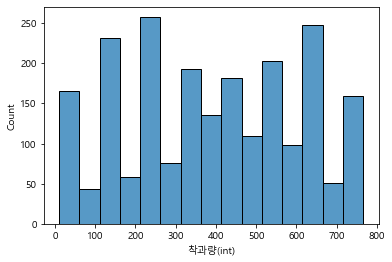

In [19]:
sns.histplot(submission['착과량(int)'])

<AxesSubplot:xlabel='착과량(int)', ylabel='Density'>

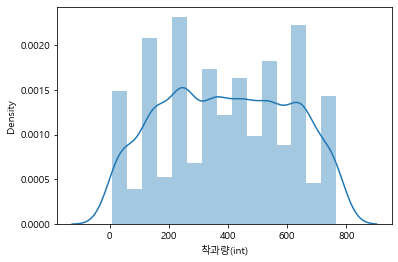

In [20]:
sns.distplot(submission['착과량(int)'])